# 파이썬으로 배우는 기계학습
# Machine Learning with Python
**************

# 제 17강: XOR 신경망 예제
- 인공 신경망을 처음 공부할 때 반드시 통과해야 할 관문 중에 하나는 인공 신경망의 표기법입니다. 본 강의는 주로 Andrew Ng 교수의 표기법을 사용하고 있습니다. 
- Andrew Ng 교수의 표기법 한글 번역본이 [여기](http://taewan.kim/post/nn_notation/) 있으며, 강의
[Coursera: Neural Networks and Deep Learning by deeplearning.ai, 4Week: Deep Neural Networks - Deep L-layer neural network](https://www.coursera.org/learn/neural-networks-deep-learning/lecture/7dP6E/deep-l-layer-neural-network)를 참고하길 바랍니다. 
- [A Neural Network in Python, Part 1: sigmoid function, gradient descent & backpropagation](http://python3.codes/neural-network-python-part-1-sigmoid-function-gradient-descent-backpropagation/)

## 1. XOR 신경망 예제

앞 강의들에서 우리는 4개의 뉴론으로 구성된 신경망으로 비선형 문제(예: $XOR$ 배타적 논리합)를 해결할 수 있다는 것을 알게 되었습니다. 우리는 앞에서 복잡한 수학적 접근을 해보았는데, 이제부터는 복잡한 계산은 컴퓨터에 맡길 수 있도록 코딩을 해보길 원합니다. 그래서, 우리가 수학적으로 예측한 것이 실제로 일어나는지 보기 위해 코딩을 간단히 시작해 봅시다.

$XOR$와 같이 각각 2개의 입력 노드와 3개의 은닉층의 뉴론과 1개의 출력층 노드로 구성된 작은 신경망을 이용해 작업해봅시다.  (문헌에 따라서는 입력층을 하나의 층을 간주하지 않기 때문에 뉴론으로 구성된 층만을 고려하여 2개 층으로 구성된 신경망이라고 봅니다).  

다음은 신경망의 입출력과 각 층들 사이의 가중치 표기를 보여줍니다. 여기도 역시 $W^T_{ij}$형식의 표기를 사용하도록 하겠습니다. 

<img src="images/XOR-NN-Weights.png" width="600">
<center>그림 1: XOR 신경망의 입력과 가중치</center>

## 2. 입력 자료 전처리

$XOR$ 학습자료는 앞에서 다루었던 붓꽃자료보다 훨씬 간단합니다.  다만, XOR 학습자료의 특성 행렬$^{feature \ matrix}$ $\mathbf{X} = (m \ features, n \ samples)$로 표기하고, 각 행은 특성을 나타내며, 각 열은 한 샘플을 나타냅니다. 그러면, $XOR$ 학습자료는 $\mathbf{X}$는 2 개의 특성과 4개의 샘플을 가진 $2 \times 4$ 행렬입니다.  다음은 각각의 입력 자료를 컬럼 벡터로 나타낸 형식입니다. 

\begin{align} \mathbf{X} = 
\begin{pmatrix} 
  x^{(1)}_1 & x^{(2)}_1  &  x^{(3)}_1 & x^{(4)}_1 \\
  x^{(1)}_2 & x^{(2)}_2  &  x^{(3)}_2 & x^{(4)}_2 \\  
\end{pmatrix}  =
\begin{pmatrix} 0 & 0 & 1 & 1 \\ 0 & 1 & 0 & 1  \end{pmatrix} 
\end{align}


신경망의 목표값 즉 클래스 레이블 $y$는 XOR 진리표를 따르면 되므로 다음과 같습니다.  $y$의 크기는 입력의 크기와 같게 설정하였습니다. 4개의 샘플에 대한 클래스 레이블을 포함하기 때문에 $y$는 $1\times4$ 행렬이 됩니다.  
\begin{align}  \mathbf{y} = 
   \begin{pmatrix}  y^{(1)} & y^{(2)} & y^{(3)} & y^{(4)}  \end{pmatrix}  = 
   \begin{pmatrix} 0 & 1 & 1 & 0 \end{pmatrix} 
\end{align}

XOR 학습자료는 넘피를 사용하여 다음과 같이 코딩할 수 있습니다. $Y$의 형상이 $(4, )$가 아니라 $(1, 4)$임을 유의하길 바랍니다. 

In [11]:
import numpy as np
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])    #(1, 4), but [0, 1, 1, 0].shape = (4, ) 
print('X.shape={}, Y.shape{}'.format(X.shape, Y.shape))

X.shape=(2, 4), y.shape(1, 4)


In [14]:
import numpy as np
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])    
print('X.shape={}, Y.shape{}'.
      format(X.shape, Y.shape))
print(X)
print(Y)

X.shape=(2, 4), Y.shape(1, 4)
[[0 0 1 1]
 [0 1 0 1]]
[[0 1 1 0]]


## 3. 가중치 설정

입력층과 은닉층 사이의 가중치는 $\mathbf{W}^{[1]}$, 은닉층과 출력층의 가중치는 $\mathbf{W}^{[2]}$ 행렬로 표기할 수 있습니다. 윗첨자는 층의 일련번호를 의미하며, 아랫첨자는 두 뉴론 사이를 의미합니다. 그렇다면 입력층과 은닉층 사이의 가중치 $W^{[1]}$와 은닉층과 출력층 사이의 가중치 $W^{[2]}$의 크기는 각각 어떻게 될까요? 먼저 $W^{[1]}$은 입력층이 2개이고 은닉층이 3개이기 때문에 $3 \times 2$가 됩니다. 또한, $W^{[2]}$은 은닉층이 3개이고 출력층이 1개이기 때문에 $1 \times 3$이 됩니다.


여기서도 역시 $W_{ij}^T$ 형식을 사용했습니다. 

\begin{equation} W^{[1]} = 
\begin{pmatrix} 
w_{11}^{[1]} & w_{21}^{[1]} \\ 
w_{12}^{[1]} & w_{22}^{[1]}  \\ 
w_{13}^{[1]} & w_{23}^{[1]}
\end{pmatrix}, \qquad  W^{[2]} = 
\begin{pmatrix} w_{11}^{[2]} & w_{21}^{[2]} & w_{31}^{[2]} \end{pmatrix} 
\end{equation}

그러면, 가중치는 어떤 값으로 시작해야 할까요? 

이는 아주 좋은 질문입니다. 
-1과 1사이의 작은 난수로 가중치를 초기화할 수 있습니다. 이런 때를 위하여 넘피의 난수 발생 함수를 사용하면 쉽게 가중치 행렬을 만들 수 있습니다.  다음 코드를 참조하면 됩니다. 다만, 입력층, 은닉층, 그리고 출력층의 각 노드 수를 변수에 저장하면, 이에 따라 더 손쉽게 신경망의 크기를 조정할 수 있습니다.  

사용자가 은닉층 노드의 수만 정하면, 가중치의 형상은 다음과 같이 자연스럽게 결정되는 것에 유의하십시오.  

함수 `random.seed()`는 난수 발생을 항상 일정하게 하여 같은 난수를 발생할 수 있도록 하기 위하여 씨드값을 설정하는 것입니다.  코드 디버깅할 때 유용합니다. 

In [12]:
n_x = X.shape[0]           # the size of input layer,   X.shape = (2, 4)
n_y = Y.shape[0]           # the size of output layer, Y.shape = (1, 4)
n_h = 3                      # the size of hidden layer
np.random.seed(1)
W1 = 2*np.random.random((n_h, n_x)) - 1
W2 = 2*np.random.random((n_y, n_h)) - 1  

`n_x`은 입력층 노드의 개수, `n_h`은 은닉층 노드의 개수, 그리고 `n_y`은 출력층 노드의 개수를 각각 저장합니다.
<span style="color:purple">
위의 코드에서 np.random 모듈에 있는 random 메소드를 사용했습니다. random 메소드는 [0.0, 1.0) 의 실수 값, 즉 0에서 1사이의 값을 반환합니다. 가중치를 초기화할 때, 앞의 범위에 2를 곱하고 1을 빼주게 됨으로써, 가중치는 [-1.0, 1.0) 의 실수 값을 반환합니다. 
</span>

<span style="color:purple">
우리가 생각한대로 가중치가 초기화되었는지 확인해봅시다.
</span>

In [9]:
print("W1: {}".format(W1))
print("W2: {}".format(W2))

W1: [[-0.16595599  0.44064899]
 [-0.99977125 -0.39533485]
 [-0.70648822 -0.81532281]]
W2: [[-0.62747958 -0.30887855 -0.20646505]]


## 4. 순전파 
다음은 순전파를 위한 연산입니다. 단지 4줄의 코딩으로 완성됩니다. 
Z1은 은닉층의 입력(Sum-Product)이며, A1은 Z1를 활성화 함수에 적용한 값으로 은닉층의 출력입니다.  그리고, 은닉층의 출력값 A1은 출력층의 입력이 되어, 출력층의 입력 Z2를 구하는데 사용합니다. Z2 역시 활성화 함수를 적용하여 최종 출력값 A2를 구함으로 순전파 연산을 완성합니다. 

<span style="color:purple">
순전파는 학습 과정 중의 일부이기에, 앞서 초기화한 가중치와는 다르게 반복 횟수 epoch을 정해 그만큼 반복해주어야 합니다. 아래에서 역전파 및 가중치를 수정하는 과정을 보여드린 후에, 한번에 코드로 실행해보겠습니다.
</span>

    Z1 = np.dot(W1, X)             # hidden layer input
    A1 = g(Z1)                     # hidden layer output
    Z2 = np.dot(W2, A1)            # output layer input
    A2 = g(Z2)                     # output layer results

<img src="images/multi-layerNN-4.PNG" width="600">
<center>그림 2: 다층 신경망의 역전파</center>

## 5. 역전파와 가중치 조정

역전파 역시 어렵지 않게 코딩을 할 수 있습니다.  

- 최종 출력값 $A2$와 클래스 레이블 $Y$로 오차 $E2$를 구합니다. 
- 은닉층의 오차 $E1$도 역전파할 때 사용할 수 있도록 계산합니다.  
- $dZ2$는 출력층의 활성화 함수를 미분하여 출력층의 입력에 대한 기울기를 구합니다. 
- $dZ1$은 은닉층의 활성화 함수를 미분하여 은닉층의 입력에 대한 기울기를 구합니다.
- 출력층의 입력값에서의 기울기 값으로 가중치 $W2$ 조정값을 구합니다.  
- 은닉층의 입력값에서의 기울기 값으로 가중치 $W1$ 조정값을 구합니다. 
- 각각 구한 $W1, W2$ 조정값으로 가중치를 조정하고 이를 반복 실행합니다.  

```
    E2 = Y - A2                    # error @ output
    E1 = np.dot(W2.T, E2)          # error @ hidden

    dZ2 = E2 * g_prime(Z2)         # backprop   dZ2  
    dZ1 = E1 * g_prime(Z1)         # backprop   dZ1 
    
    W2 +=  np.dot(dZ2, A1.T)       # update output layer weights
    W1 +=  np.dot(dZ1, X.T)        # update hidden layer weights
```

## 6. XOR 3층 신경망 코드

다음은 완성된 XOR 3층 신경망 코드입니다. 주요 변수들 정리하면 코드를 이해하는데 도움이 될 것입니다. 

- `g` - 활성화 함수
- `g_prime` - 활성화 함수의 미분
- `epochs` - 반복 횟수
- `X` - 2개의 특성을 가진 4개의 입력 자료, (2, 4) 형상
- `Y` - 4개의 입력 자료에 대한 클래스 레이블, (1, 4) 형상
- `n_x` - 입력 자료에 주어진 특성의 수, X.shape[0]
- `n_h` - 사용자가 결정하는 은닉층 노드의 수
- `n_y` - 출력 자료의 크기, 클래스 레이블의 수, Y.shape[0]
- `W1`, `W2` - 은닉층과 출력층의 가중치
- `cost_` - 학습 과정의 각 반복 실행에서 발생하는 오차의 기록
- `A0` - 입력 같음. (표기의 일괄성을 위해 삽입됨)
- `A?` - 각 층의 노드에서 연산한 결과 값, 
- `A2` - 신경망의 예측 값 (최종 출력 값)
- `Z?` - 각 층의 노드의 입력 값, 앞 층의 출력과 가중치를 곱하여 합산한 값
- `E?` - 각 층에서 연산한 오차
- `dZ?` - 각 층에서 조정해야 할 가중치 값

In [1]:
#%%writefile xor.py
# xor.py-A very simple neural network to do exclusive or.
# use WijT and column vector style data

import numpy as np

g = lambda x: 1/(1 + np.exp(-x))       # activation function
g_prime = lambda x: g(x) * (1 - g(x))   # derivative of sigmoid

epochs = 2000

X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])                #=(1, 4),  but [0, 1, 1, 0].shape = (4, ) 

n_x = X.shape[0]
n_y = Y.shape[0]
n_h = 3

np.random.seed(1)
W1 = 2*np.random.random((n_h, n_x)) - 1
W2 = 2*np.random.random((n_y, n_h)) - 1  
print('X.shape={}, Y.shape{}'.format(X.shape, Y.shape))
print('n_x={}, n_h={}, n_y={}'.format(n_x, n_h, n_y))
print('W1.shape={}, W2.shape={}'.format(W1.shape, W2.shape))
cost_ = []

for i in range(epochs):
    A0 = X                             # unnecessary, but to illustrate only
    Z1 = np.dot(W1, A0)           # hidden layer input
    A1 = g(Z1)                        # hidden layer output
    Z2 = np.dot(W2, A1)           # output layer input
    A2 = g(Z2)                        # output layer results
    
    E2 = Y - A2                       # error @ output
    E1 = np.dot(W2.T, E2)          # error @ hidden
    if i == 0:
        print('E1.shape={}, E2.shape={}'.format(E1.shape, E2.shape))

    dZ2 = E2 * g_prime(Z2)        # backprop      # dZ2 = E2 * A2 * (1 - A2)  
    dZ1 = E1 * g_prime(Z1)        # backprop      # dZ1 = E1 * A1 * (1 - A1)  
    
    W2 +=  np.dot(dZ2, A1.T)     # update output layer weights
    W1 +=  np.dot(dZ1, A0.T)       # update hidden layer weights
    cost_.append(np.sum(E2 * E2))

print('fit returns A2:', A2)

print("Final prediction of all")
for x, yhat in zip(X.T, A2.T):
    print(x, np.round(yhat, 3))

X.shape=(2, 4), Y.shape(1, 4)
n_x=2, n_h=3, n_y=1
W1.shape=(3, 2), W2.shape=(1, 3)
E1.shape=(3, 4), E2.shape=(1, 4)
fit returns A2: [[0.03133802 0.97052522 0.49935356 0.50054444]]
Final prediction of all
[0 0] [0.031]
[0 1] [0.971]
[1 0] [0.499]
[1 1] [0.501]


<span style="color:purple">
앞에서 설명한 내용을 코딩으로 옮겼습니다. 총 2000번의 순전파, 역전파를 진행하며 가중치를 조정했습니다. 예측값 yhat 을 확인해보니 실망스러운 결과가 나왔습니다. [0, 0] 과 [0, 1] 의 예측값은 0.031과 0.971로 XOR에 맞게 예측을 했지만, [1, 0], [1, 1] 에 대한 예측값은 0.5 정도로 학습 효과가 없어 보입니다.
</span>

<span style="color:purple">
학습과정중에 비용함수 값을 `cost_` 리스트에 저장하였습니다. 아래의 그래프를 보면 에러값이 작아지다가 0.5 정도 되는 선에서 그만 줄어들게 되는 것을 확인할 수 있습니다.
</span>

In [2]:
import matplotlib.pyplot as plt 

plt.plot(range(len(cost_)), cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.show()

<Figure size 640x480 with 1 Axes>

<span style="color:purple">
혹시 우리가 설계한 신경망이 XOR을 학습하기에 너무 단순화되지는 않았을까요? `n_h`을 4로 늘리고 결과를 확인해보겠습니다.
</span>

In [3]:
import numpy as np

g = lambda x: 1/(1 + np.exp(-x))       # activation function
g_prime = lambda x: g(x) * (1 - g(x))   # derivative of sigmoid

epochs = 2000

X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
Y = np.array([[0, 1, 1, 0]])                #=(1, 4),  but [0, 1, 1, 0].shape = (4, ) 

n_x = X.shape[0]
n_y = Y.shape[0]
n_h = 4

np.random.seed(1)
W1 = 2*np.random.random((n_h, n_x)) - 1
W2 = 2*np.random.random((n_y, n_h)) - 1  
print('X.shape={}, Y.shape{}'.format(X.shape, Y.shape))
print('n_x={}, n_h={}, n_y={}'.format(n_x, n_h, n_y))
print('W1.shape={}, W2.shape={}'.format(W1.shape, W2.shape))
cost_ = []

for i in range(epochs):
    A0 = X                             # unnecessary, but to illustrate only
    Z1 = np.dot(W1, A0)           # hidden layer input
    A1 = g(Z1)                        # hidden layer output
    Z2 = np.dot(W2, A1)           # output layer input
    A2 = g(Z2)                        # output layer results
    
    E2 = Y - A2                       # error @ output
    E1 = np.dot(W2.T, E2)          # error @ hidden
    if i == 0:
        print('E1.shape={}, E2.shape={}'.format(E1.shape, E2.shape))

    dZ2 = E2 * g_prime(Z2)        # backprop      # dZ2 = E2 * A2 * (1 - A2)  
    dZ1 = E1 * g_prime(Z1)        # backprop      # dZ1 = E1 * A1 * (1 - A1)  
    
    W2 +=  np.dot(dZ2, A1.T)     # update output layer weights
    W1 +=  np.dot(dZ1, A0.T)       # update hidden layer weights
    cost_.append(np.sum(E2 * E2))

print('fit returns A2:', A2)

print("Final prediction of all")
for x, yhat in zip(X.T, A2.T):
    print(x, np.round(yhat, 3))

X.shape=(2, 4), Y.shape(1, 4)
n_x=2, n_h=4, n_y=1
W1.shape=(4, 2), W2.shape=(1, 4)
E1.shape=(4, 4), E2.shape=(1, 4)
fit returns A2: [[0.04991864 0.95753054 0.96062609 0.02878981]]
Final prediction of all
[0 0] [0.05]
[0 1] [0.958]
[1 0] [0.961]
[1 1] [0.029]


<span style="color:purple">
결과가 놀랍도록 정확합니다. 프린트된 예측 결과를 보게되면, 우리가 정의한 신경망이 XOR 함수를 학습했다는 것을 확인할 수 있습니다.
</span>

<span style="color:purple">
아래 비용함수 값의 변화를 보게되면 `cost_`가 거의 0에 수렴하는 것을 확인할 수 있습니다. 완벽하게 학습을 한 것 같군요!
</span>

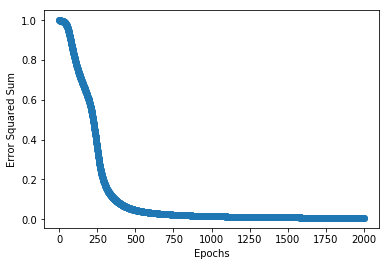

In [4]:
import matplotlib.pyplot as plt 

plt.plot(range(len(cost_)), cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Error Squared Sum')
plt.show()

<span style="color:purple">
</span>


#### 참고자료 - plot_decision_regions()

Final prediction of all
predict: W1.shape:(4, 2), Xshape:(4, 2) 
[0 0] [ 0.04990407]
[0 1] [ 0.95754267]
[1 0] [ 0.96063759]
[1 1] [ 0.02878206]
predict: W1.shape:(4, 2), Xshape:(14884, 2) 


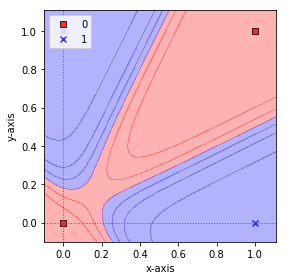

In [8]:
import matplotlib.pyplot as plt 
import joy

def predict(X): 
    print('predict: W1.shape:{}, Xshape:{} '.format(W1.shape, X.shape))
    Z1 = np.dot(W1, X.T)        # hidden layer input
    A1 = g(Z1)                     # hidden layer output
    Z2 = np.dot(W2, A1)        # output layer input
    A2 = g(Z2)                     # output layer results
    return A2
    
# Show the prediction results
print("Final prediction of all")
A2 = predict(X.T)
for x, yhat in zip(X.T, A2.T):
    print(x, yhat)
    
#joy.plot_decision_regions(np.delete(X, 0, axis=1), Y.flatten(), lg)   # np.squeeze(Y)
joy.plot_decision_regions(X.T, Y, predict)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## 참고자료: XOR 3층 신경망 코드(Wij and row vector style)

In [11]:
#%%writefile xor.py
#  xor.py-A very simple neural network to do exclusive or.
# use Wij and row vector style data as they are
import numpy as np

g = lambda x: 1/(1 + np.exp(-x))       # activation function
g_prime = lambda x: g(x) * g(1 - x)    # derivative of sigmoid

epochs = 6000
inputLayerSize, hiddenLayerSize, outputLayerSize = 2, 4, 1

X = np.array([[0,0], [0,1], [1,0], [1,1]])
Y = np.array([ [0],   [1],   [1],   [0]])

#np.random.seed(4)
W1 = np.random.uniform(size=(inputLayerSize, hiddenLayerSize))
W2 = np.random.uniform(size=(hiddenLayerSize,outputLayerSize))
print('X.shape={}, Y.shape{}'.format(X.shape, Y.shape))
print('W1.shape={}, W2.shape={}'.format(W1.shape, W2.shape))

for i in range(epochs):
    Z1 = np.dot(X, W1)                # hidden layer input
    A1 = g(Z1)                           # hidden layer output
    Z2 = np.dot(A1, W2)               # output layer input
    A2 = g(Z2)                           # output layer results
    
    E2 = Y - A2                          # error @ output
    E1 = np.dot(E2, W2.T)             # error @ hidden

    dZ2 = E2 * g_prime(Z2)        # backprop      # dZ2 = E2 * A2 * (1 - A2)  
    dZ1 = E1 * g_prime(Z1)        # backprop      # dZ1 = E1 * A1 * (1 - A1)  
    
    W2 +=  np.dot(A1.T, dZ2)            # update output layer weights
    W1 +=  np.dot(X.T, dZ1)             # update hidden layer weights
    
print(np.round(A2, 3))                # what have we learnt?

X.shape=(4, 2), Y.shape(4, 1)
W1.shape=(2, 4), W2.shape=(4, 1)
[[ 0.039]
 [ 0.986]
 [ 0.985]
 [ 0.002]]


Final prediction of all
Xshape:(4, 2) W1.shape:(2, 4)
[0 0] [ 0.03898696]
[0 1] [ 0.98640201]
[1 0] [ 0.98460079]
[1 1] [ 0.00182106]
calling plot with X= [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Xshape:(14884, 2) W1.shape:(2, 4)


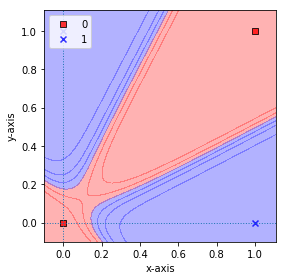

In [12]:
import matplotlib.pyplot as plt 
import joy

class xor_net:
    def predict(self, X): 
        print('Xshape:{} W1.shape:{}'.format(X.shape, W1.shape))
        Z1 = np.dot(X, W1)             # hidden layer input
        A1 = g(Z1)                     # hidden layer output
        Z2 = np.dot(A1, W2)            # output layer input
        A2 = g(Z2)                     # output layer results
        return A2
    
nn = xor_net()
# Show the prediction results
print("Final prediction of all")
Yhat = nn.predict(X)
for x, yhat in zip(X, Yhat):
    print(x, yhat)
    
#joy.plot_decision_regions(np.delete(X, 0, axis=1), Y.flatten(), lg)   # np.squeeze(Y)
print('calling plot with X=', X)
joy.plot_decision_regions(X, Y.flatten(), nn)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

# 참고 자료 
    
    
    

[1] Bengio, Yoshua. "Practical recommendations for gradient-based training of deep architectures." Neural Networks: Tricks of the Trade. Springer Berlin Heidelberg, 2012. 437-478.

[2] LeCun, Y., Bottou, L., Orr, G. B., and Muller, K. (1998a). Efficient backprop. In Neural Networks, Tricks of the Trade.

[3] Glorot, Xavier, and Yoshua Bengio. "Understanding the difficulty of training deep feedforward neural networks." International conference on artificial intelligence and statistics. 2010.

[4] Hsu, Chih-ling., ["Code Example of a Neural Network for The Function XOR"](https://chih-ling-hsu.github.io/2017/08/30/NN-XOR)